In [24]:
import pandas as pd

In [25]:
df = pd.read_excel("mobile.xlsx")
df

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
0,56,82,121.54
1,1,221,287.51
2,36,68,113.70
3,23,96,410.23
4,29,139,537.60
...,...,...,...
4487,30,66,186.20
4488,23,112,500.68
4489,5,189,470.42
4490,69,124,858.99


In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
kmeans.fit(df)

df['Кластер'] = kmeans.labels_
df

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,Кластер
0,56,82,121.54,1
1,1,221,287.51,1
2,36,68,113.70,1
3,23,96,410.23,1
4,29,139,537.60,1
...,...,...,...,...
4487,30,66,186.20,1
4488,23,112,500.68,1
4489,5,189,470.42,1
4490,69,124,858.99,0


In [28]:
criterion = []  # Значения критерия

for k in range(2, 8):  # Изменеие количества кластеров
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    criterion.append(kmeans.inertia_)

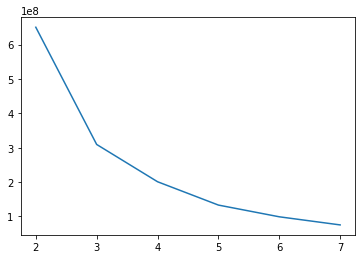

In [29]:
import matplotlib.pyplot as plt

plt.plot(range(2, 8), criterion)

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

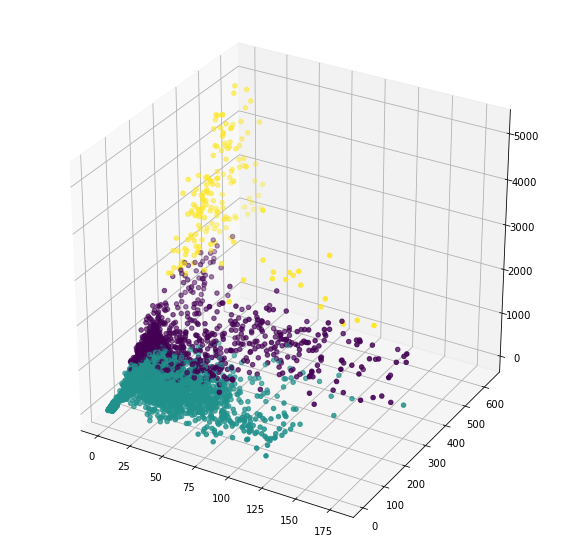

In [39]:
fig = plt.figure(figsize=(10, 10))
ax= fig.add_subplot(111, projection='3d')

x = np.array(df['Количество SMS за месяц'])
y = np.array(df['Количество звонков'])
z = np.array(df['Среднемесячный расход'])

ax.scatter(x, y, z, c=df['Кластер'])

plt.show()